<h2>Project:</h2>
<ul style="margin-top: 10px;font-size: 19px;color:#333; padding:0">
    A Company named XYZ has a problem of attrition .The rate of attrition has been quite high so
being the head analyst of the company the repost on all the employees has been provided to
you and you need to find out the reason of attrition so the company can reduce the attrition.
This is a projet that needs to be worked upon everyday as we go forward with the class and in
the end after all the test have been taught you can give a detailed report as to why there has
been a high rate of attrition in the company .

</ul>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, chi2_contingency, ttest_ind
import seaborn as sns

In [2]:
na_vals = ["NA", "Na", "NaN", "Missing"]
df = pd.read_csv("general_data.csv", na_values = na_vals, index_col = "EmployeeID")
df.drop_duplicates(inplace=True)
df.dropna(how="any", inplace=True)
#df.drop(columns = ["Over18", "EmployeeCount", "StandardHours"], inplace=True)

In [3]:
df.head(15)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,4,...,3.0,Y,13,8,0,28.0,5,7,7,7
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,2,...,2.0,Y,20,8,1,5.0,2,0,0,0
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,2,...,2.0,Y,22,8,3,10.0,2,0,0,0
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,3,...,0.0,Y,21,8,0,10.0,2,9,7,8


In [4]:
df_left = df[df["Attrition"] == "Yes"]
df_stay = df[df["Attrition"] == "No"]
df_stay.reset_index(drop=True, inplace=True)
df_left.reset_index(drop=True, inplace=True)

label_mapping = {"Yes": 1, "No": 0}
df_attrition = df.Attrition.map(label_mapping)

In [5]:
def distribution_check(column):
    description = {
        "Mean": [df_left[column].mean(), df_left[column].mean()],
        "Median": [df_left[column].median(), df_stay[column].median()],
        "Mode": [df_left[column].mode()[0], df_stay[column].mode()[0]],
        "Skew": [df_left[column].skew(), df_stay[column].skew()],
        "Kurt": [df_left[column].kurt(), df_stay[column].kurt()]
    }
    df_new = pd.DataFrame(description)
    df_new.rename(index={0:"Attrited_"+column, 1:"Stayed_"+column}, inplace = True)
    plt.hist([df_left[column],df_stay[column]], label=["Attrited_"+column, "Stayed_"+column])
    plt.legend(loc='upper right')
    return df_new

In [6]:
def hypo_chooser(p):
    print(f"p = {p}\nHence ",end = "")
    if p >= 0.05:
        print("Ho is considered since p >= 0.05")
    else:
        print("H1 is considered since p < 0.05")

In [7]:
def corr_detector(column):
    r, p = pearsonr(df_attrition, df[column])
    if p < 0.05:
        print(f"There is interdepency between Attrition and {column}\nH1 is considered")
        if not np.isnan(r):
            if abs(r)>0.5:
                print("A strong ", end="")
            else:
                print("A weak ", end="")
            if r > 0:
                print("positive correlation is found ",end="")
                string = "increases"
            else:
                print("negative correlation is found ",end="")
                string = "decreases"

            print("with r =", round(r,3))
            print(f"Hence as {column} increases, Attrition {string}")

        else:
            print("No correlation is found")
    else:
        print(f"There is no interdepency between Attrition and {column}")

In [8]:
def chi2_result(chitable):
    chitable['No_pct'] = chitable["No"] /(chitable["No"] + chitable["Yes"]) *100
    chitable['Yes_pct'] = chitable["Yes"] /(chitable["No"] + chitable["Yes"]) *100
    
    chitable.drop(columns=["No", "Yes"], inplace=True)
    ax = chitable.plot(kind="bar", stacked="True")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.legend(loc='lower left')
    
    return chitable

<h2>Age vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">Ho:There is no significant difference in the age of the employees who left and who didn't leave<br>
H1:There is a significant difference in the age of the employees who left and who didn't leave<br></p>
<p style="margin-top: 10px;font-size: 17px;color:#333">First we shall be checking both the variables are parametric or not</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_Age,33.607595,32.0,29,0.715732,-0.057044
Stayed_Age,33.607595,36.0,34,0.408122,-0.411835


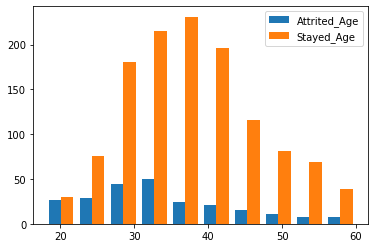

In [9]:
distribution_check("Age")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's age<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [10]:
stats, p = mannwhitneyu(df_stay.Age, df_left.Age)
hypo_chooser(p)

p = 2.652171037670851e-11
Hence H1 is considered since p < 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    Therefore, there are dependencies between age and attrtion variables.<br>
    Next we will be testing the correlation between both the variables<br>
</p>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no interdepency in the Age and Attrion variables<br>
    H1:There is interdepency in the Age and Attrion variables<br>
</p>

In [11]:
corr_detector("Age")

There is interdepency between Attrition and Age
H1 is considered
A weak negative correlation is found with r = -0.159
Hence as Age increases, Attrition decreases


<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
<b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
    Hence attrition can be reduced by hiring aged employees having age of approximately 36 years old or above</b>
</p>

<h2>Buissiness Travel vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between BusinessTravel and Attribution<br>
    H1:There is dependency between BusinessTravel and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [12]:
chitable = pd.crosstab(df.BusinessTravel, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 5.608614476449931e-06
Hence H1 is considered since p < 0.05


Attrition,No_pct,Yes_pct
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


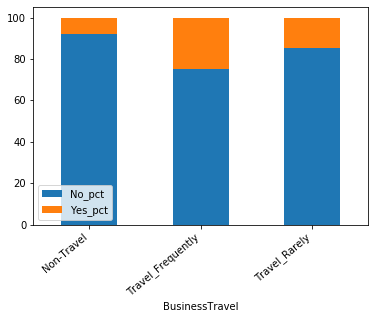

In [13]:
chi2_result(chitable)

<p style = "font-size: 19px; margin-bottom: 7px">
From the above table, the percentage of people who left is the highest for who traveled frequently
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
<b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
    Hence attrition can be reduced by reducing the buisiness travels for employees</b>
</p>

<h2>Department vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between Department and Attribution<br>
    H1:There is dependency between Department and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [14]:
chitable = pd.crosstab(df.Department, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 0.00784107643171164
Hence H1 is considered since p < 0.05


Attrition,No_pct,Yes_pct
Department,,
Human Resources,69.841270,30.158730
Research & Development,84.287201,15.712799
Sales,84.977578,15.022422


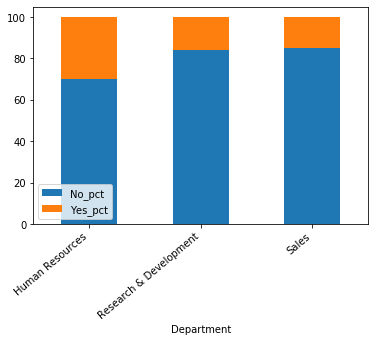

In [15]:
chi2_result(chitable)

<p style = "font-size: 19px; margin-bottom: 7px">
    From the above table, the percentage of people who left from HR department is the most
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Hence attrition can be reduced by building strong bonds with the HR department 
    </b>
</p>

<h2>DistanceFromHome vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in distance from home of employees who left and who didn't leave<br>
    H1:There is significant difference in distance from home of employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_DistanceFromHome,9.012658,7.0,2,0.968525,-0.025224
Stayed_DistanceFromHome,9.012658,7.0,1,0.955845,-0.258595


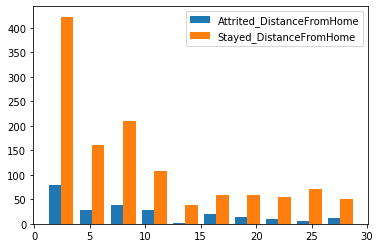

In [16]:
distribution_check("DistanceFromHome")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing       both these variable's distance from home<br>
    Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [17]:
stats, p = mannwhitneyu(df_stay.DistanceFromHome, df_left.DistanceFromHome)
hypo_chooser(p)

p = 0.4786049358224514
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between DistanceFromHome and Attrition variables
    </b>
</p>

<h2>Education vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between Education and Attribution<br>
    H1:There is dependency between Education and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [18]:
chitable = pd.crosstab(df.Education, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 0.7577477640783867
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between Education and Attrition variables.
    </b>
</p>

<h2>EducationField vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between EducationField and Attribution<br>
    H1:There is dependency between EducationField and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [19]:
chitable = pd.crosstab(df.EducationField, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 0.00878935071037593
Hence H1 is considered since p < 0.05


Attrition,No_pct,Yes_pct
EducationField,,
Human Resources,59.259259,40.740741
Life Sciences,83.333333,16.666667
Marketing,84.276730,15.723270
Medical,83.836207,16.163793
Other,87.804878,12.195122
Technical Degree,88.636364,11.363636


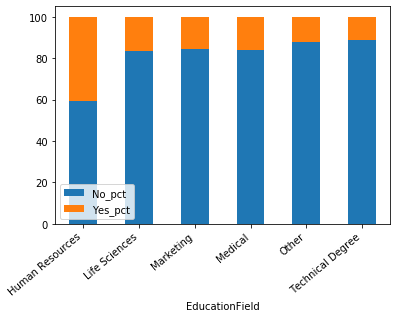

In [20]:
chi2_result(chitable)

<p style = "font-size: 19px; margin-bottom: 7px">
    From the above table, the percentage of people who left from HR department is the most, while the percentage in other education fields isn't that high
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Hence attrition can be reduced by keeping hiring of employees for the HR department strict so only the
    </b>
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
         skilled and promising employees are taken
    </b>
</p>

<h2>Gender vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between Gender and Attribution<br>
    H1:There is dependency between Gender and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [21]:
chitable = pd.crosstab(df.Gender, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 0.5335882358793274
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between Gender and Attrition variables.
    </b>
</p>

<h2>JobLevel vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between JobLevel and Attribution<br>
    H1:There is dependency between JobLevel and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [22]:
chitable = pd.crosstab(df.JobLevel, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 0.7192602477461422
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between JobLevel and Attrition variables.
    </b>
</p>

<h2>JobRole vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between JobRole and Attrition<br>
    H1:There is dependency between JobRole and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [23]:
chitable = pd.crosstab(df.JobLevel, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 0.7192602477461422
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between JobRole and Attrition variables.
    </b>
</p>

<h2>MaritalStatus vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no dependency between MaritalStatus and Attrition<br>
    H1:There is dependency between MaritalStatus and Attribution<br></p>
<div style="margin-top: 10px;font-size: 19px;color:#333">
    Since we're checking the dependency of categorical variables<br>
    Therefore we will be using chi square test statistic<br>
</div>

In [24]:
chitable = pd.crosstab(df.MaritalStatus, df.Attrition)
stats, p, dof, expected = chi2_contingency(chitable)
hypo_chooser(p)

p = 9.45551106034083e-11
Hence H1 is considered since p < 0.05


Attrition,No_pct,Yes_pct
MaritalStatus,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


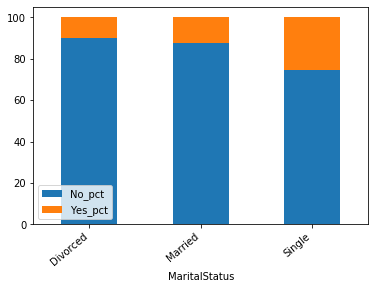

In [25]:
chi2_result(chitable)

<p style = "font-size: 19px; margin-bottom: 7px">
    From the above table, we can assume that people who are single have a high chance of leaving the company
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Hence attrition can be reduced by reducing hiring for people who are single 
    </b>
</p>

<h2>MonthlyIncome vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in the monthly income of the employees who left and who didn't leave<br>
    H1:There is significant difference in the monthly income of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_MonthlyIncome,61682.616034,49080.0,25590,1.547263,1.698953
Stayed_MonthlyIncome,61682.616034,49300.0,23420,1.339646,0.901112


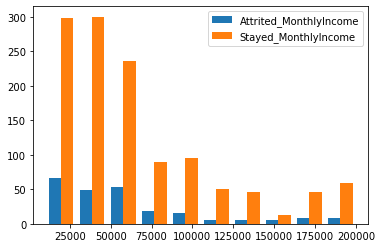

In [26]:
distribution_check("MonthlyIncome")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's monthly income<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [27]:
stats, p = mannwhitneyu(df_stay.MonthlyIncome, df_left.MonthlyIncome) 
hypo_chooser(p)

p = 0.17621332994327893
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between MonthlyIncome and Attrition variables
    </b>
</p>

<h2>NumCompaniesWorked vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in the number of companies worked by the employees who left and who didn't leave<br>
    H1:There is significant difference in the number of companies worked by the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_NumCompaniesWorked,2.940928,1.0,1.0,0.864170,-0.543064
Stayed_NumCompaniesWorked,2.940928,2.0,1.0,1.058795,0.141433


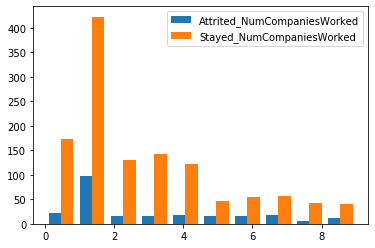

In [28]:
distribution_check("NumCompaniesWorked")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's number of companies worked<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [29]:
stats, p = mannwhitneyu(df_stay.NumCompaniesWorked, df_left.NumCompaniesWorked)
hypo_chooser(p)

p = 0.12118252544058267
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between NumCompaniesWorked and Attrition variables
    </b>
</p>

<h2>PercentSalaryHike vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in percent salary hike of the employees who left and who didn't leave<br>
    H1:There is significant difference in percent salary hike of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_PercentSalaryHike,15.481013,14.0,13,0.766943,-0.407232
Stayed_PercentSalaryHike,15.481013,14.0,11,0.831684,-0.278155


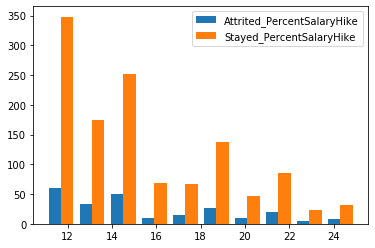

In [30]:
distribution_check("PercentSalaryHike")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's salary hike percentage<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [31]:
stats, p = mannwhitneyu(df_stay.PercentSalaryHike, df_left.PercentSalaryHike)
hypo_chooser(p)

p = 0.11471348352261845
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between PercentSalaryHike and Attrition variables
    </b>
</p>

<h2>StockOptionLevel vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in stock option level of the employees who left and who didn't leave<br>
    H1:There is significant difference in stock option level of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_StockOptionLevel,0.780591,1.0,0,0.963221,0.272327
Stayed_StockOptionLevel,0.780591,1.0,0,0.971550,0.389274


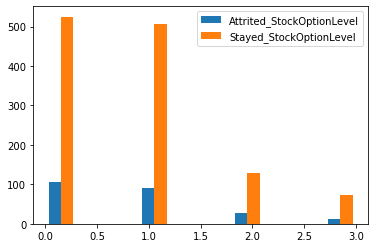

In [32]:
distribution_check("StockOptionLevel")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's stock optional level<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [33]:
stats, p = mannwhitneyu(df_stay.StockOptionLevel, df_left.StockOptionLevel)
hypo_chooser(p)

p = 0.3576509279897325
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between StockOptionLevel and Attrition variables
    </b>
</p>

<h2>TotalWorkingYears vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in total working years of the employees who left and who didn't leave<br>
    H1:There is significant difference in total working years of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_TotalWorkingYears,8.244726,7.0,1.0,1.688158,3.784098
Stayed_TotalWorkingYears,8.244726,10.0,10.0,1.066923,0.678079


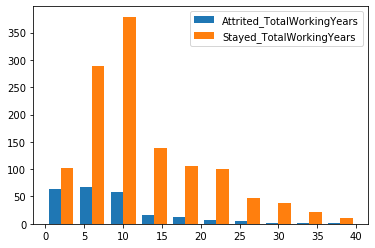

In [34]:
distribution_check("TotalWorkingYears")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's total working years<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [35]:
stats, p = mannwhitneyu(df_stay.TotalWorkingYears, df_left.TotalWorkingYears)
hypo_chooser(p)

p = 1.199784682399476e-14
Hence H1 is considered since p < 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    Therefore, there are dependencies between TotalWorkingYears and attrtion variables.<br>
    Next we will be testing the correlation between both the variables<br>
</p>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no interdepency in the TotalWorkingYears and Attrion variables<br>
    H1:There is interdepency in the TotalWorkingYears and Attrion variables<br>
</p>

In [36]:
corr_detector("TotalWorkingYears")

There is interdepency between Attrition and TotalWorkingYears
H1 is considered
A weak negative correlation is found with r = -0.171
Hence as TotalWorkingYears increases, Attrition decreases


<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
<b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
    Hence attrition can be reduced by hiring employees having experience of around 10 years or above
</b>
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
<b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
    Or allowing courses sessions for employees to learn by a skilled employee
</b>
</p>

<h2>TrainingTimesLastYear vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in TrainingTimesLastYear of the employees who left and who didn't leave<br>
    H1:There is significant difference in TrainingTimesLastYear of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_TrainingTimesLastYear,2.654008,3.0,2,0.423920,0.990962
Stayed_TrainingTimesLastYear,2.654008,3.0,2,0.556795,0.396856


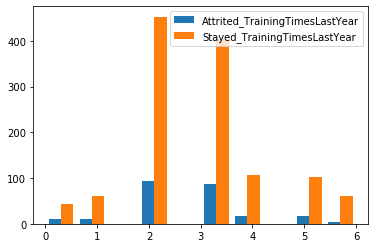

In [37]:
distribution_check("TrainingTimesLastYear")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's TrainingTimesLastYear<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [38]:
stats, p = mannwhitneyu(df_stay.TrainingTimesLastYear, df_left.TrainingTimesLastYear)
hypo_chooser(p)

p = 0.06941872499106916
Hence Ho is considered since p >= 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Therefore, there are no dependencies between TrainingTimesLastYear and Attrition variables
    </b>
</p>

<h2>YearsAtCompany vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in years at company of the employees who left and who didn't leave<br>
    H1:There is significant difference in years at company of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_YearsAtCompany,5.130802,3.0,1,2.682244,9.608029
Stayed_YearsAtCompany,5.130802,6.0,5,1.657958,3.353473


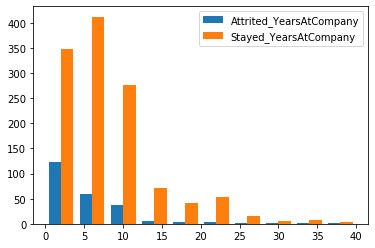

In [39]:
distribution_check("YearsAtCompany")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's years at company<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [40]:
stats, p = mannwhitneyu(df_stay.YearsAtCompany, df_left.YearsAtCompany)
hypo_chooser(p)

p = 1.458095684978208e-13
Hence H1 is considered since p < 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    Therefore, there are dependencies between YearsAtCompany and attrtion variables.<br>
    Next we will be testing the correlation between both the variables<br>
</p>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no interdepency in the YearsAtCompany and Attrion variables<br>
    H1:There is interdepency in the YearsAtCompany and Attrion variables<br>
</p>

In [41]:
corr_detector("YearsAtCompany")

There is interdepency between Attrition and YearsAtCompany
H1 is considered
A weak negative correlation is found with r = -0.134
Hence as YearsAtCompany increases, Attrition decreases


<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
<b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
    Hence attrition can be reduced by increasing bond with employees so they don't leave looking for other jobs</b>
</p>

<h2>YearsSinceLastPromotion vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in years since last promotion of the employees who left and who didn't leave<br>
    H1:There is significant difference in years since last promotion of the employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_YearsSinceLastPromotion,1.945148,1.0,0,2.217563,4.861144
Stayed_YearsSinceLastPromotion,1.945148,1.0,0,1.946710,3.430452


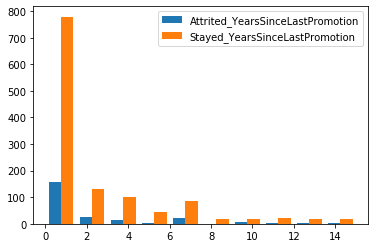

In [42]:
distribution_check("YearsSinceLastPromotion")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's number of years since the last promotion was given to them<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [43]:
stats, p = mannwhitneyu(df_stay.YearsSinceLastPromotion, df_left.YearsSinceLastPromotion)
hypo_chooser(p)

p = 0.0205895528923632
Hence H1 is considered since p < 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    Therefore, there are dependencies between YearsSinceLastPromotion and attrtion variables.<br>
    Next we will be testing the correlation between both the variables<br>
</p>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no interdepency in the YearsSinceLastPromotion and Attrion variables<br>
    H1:There is interdepency in the YearsSinceLastPromotion and Attrion variables<br>
</p>

In [44]:
corr_detector("YearsSinceLastPromotion")

There is no interdepency between Attrition and YearsSinceLastPromotion


<p style = "font-size: 19px; margin-bottom: 7px">
    It seems that employees leave right after they receive their promotion on that year itself
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Hence attrition can be reduced by discussing with employees about their job after receiving their promotion
    </b>
</p>

<h2>YearsWithCurrManager vs Attrition:</h2>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no significant difference in years spent with the current manager by employees who left and who didn't leave<br>
    H1:There is significant difference in years spent with the current manager by employees who left and who didn't leave<br>
</p>
<p style="margin-top: 10px;font-size: 17px;color:#333">
    First we shall be checking both the variables are parametric or not
</p>

,Mean,Median,Mode,Skew,Kurt
Attrited_YearsWithCurrManager,2.852321,2.0,0,1.029850,0.263528
Stayed_YearsWithCurrManager,2.852321,3.0,2,0.801229,0.139184


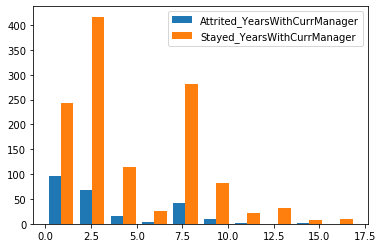

In [45]:
distribution_check("YearsWithCurrManager")

<p style="margin-top: 10px;font-size: 17px;color:#333">
    From the above data, we can proceed using non parametric test<br>
    Now there are two independent variables that are the people who left the company and the one's who didn't. We're comparing both these variable's years spent with the current manager<br>
Hence we will be using <b>Mann-Whitney Test</b>
</p>

In [46]:
stats, p = mannwhitneyu(df_stay.YearsWithCurrManager, df_left.YearsWithCurrManager)
hypo_chooser(p)

p = 9.033771291572203e-12
Hence H1 is considered since p < 0.05


<p style="margin-top: 10px;font-size: 17px;color:#333">
    Therefore, there are dependencies between YearsWithCurrManager and attrtion variables.<br>
    Next we will be testing the correlation between both the variables<br>
</p>
<p style = "font-size: 19px; margin-bottom: 7px">
    Ho:There is no interdepency in the YearsWithCurrManager and Attrion variables<br>
    H1:There is interdepency in the YearsWithCurrManager and Attrion variables<br>
</p>

In [47]:
corr_detector("YearsWithCurrManager")

There is interdepency between Attrition and YearsWithCurrManager
H1 is considered
A weak negative correlation is found with r = -0.156
Hence as YearsWithCurrManager increases, Attrition decreases


<p style = "font-size: 19px; margin-bottom: 7px">
    It seems that most employees leave on the same year as the new manager takes charge
</p>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Hence attrition can be reduced by reducing the change in manager
    </b>
<p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        Or having the new manager in the office a month early when he/she isn't in charge yet so the employees get
    </b>
    </p>
    <p style = "font-size: 19px; margin-bottom: 7px; color: brown">
    <b style = "border-bottom: 3px solid blue; padding-bottom: 5px">
        used to him/her
    </b>
    </p>
</p>

In [48]:
suggestions = {
    "Suggestions" : [
        "Attrition can be reduced by hiring aged employees having age of approximately 36 years old or above", 
        "Attrition can be reduced by reducing the buisiness travels for employees", 
        "Attrition can be reduced by building strong bonds with the HR department",
        "Attrition can be reduced by keeping hiring of employees for the HR department strict so only the skilled and promising employees are taken",
        "Attrition can be reduced by reducing hiring for people who are single",
        "Attrition can be reduced by hiring employees having experience of around 10 years and above or allowing courses sessions for employees to learn by a skilled employee",
        "Attrition can be reduced by increasing bond with employees so they don't leave looking for other jobs",
        "Attrition can be reduced by discussing with employees about their job after receiving their promotion",
        "Attrition can be reduced by reducing the change in manager or having the new manager in the office a month early when he/she isn't in charge yet so the employees get used to him/her"
    ],
}

In [49]:
dataframe = pd.DataFrame(suggestions)
pd.options.display.max_colwidth = 200
dataframe

,Suggestions
0,Attrition can be reduced by hiring aged employees having age of approximately 36 years old or above
1,Attrition can be reduced by reducing the buisiness travels for employees
2,Attrition can be reduced by building strong bonds with the HR department
3,Attrition can be reduced by keeping hiring of employees for the HR department strict so only the skilled and promising employees are taken
4,Attrition can be reduced by reducing hiring for people who are single
5,Attrition can be reduced by hiring employees having experience of around 10 years and above or allowing courses sessions for employees to learn by a skilled employee
6,Attrition can be reduced by increasing bond with employees so they don't leave looking for other jobs
7,Attrition can be reduced by discussing with employees about their job after receiving their promotion
8,Attrition can be reduced by reducing the change in manager or having the new manager in the office a month early when he/she isn't in charge yet so the employees get used to him/her
